# Explore here

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df = pd.read_csv(url, sep =',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
df.shape

(1338, 7)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [147]:
#busqueda de duplicados
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [148]:
#eliminacion de duplicados
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(1337, 7)

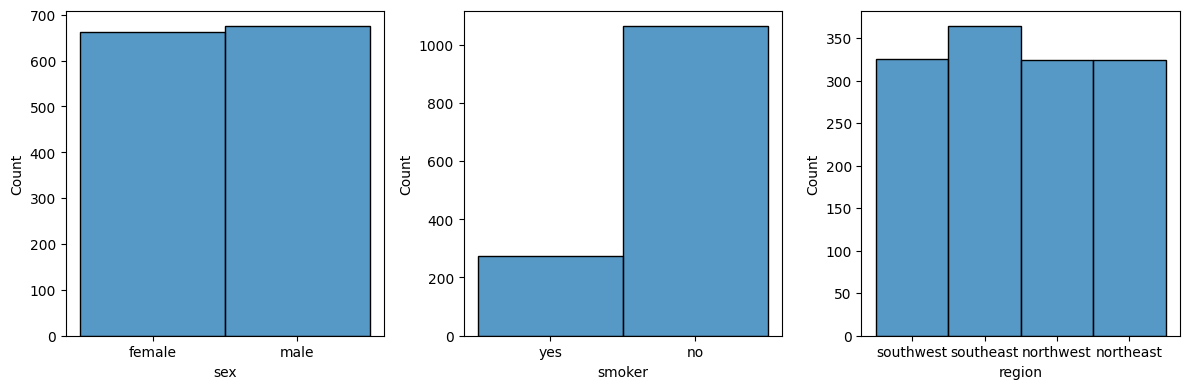

In [149]:
#visualizacion de datos categoricos
fig, axis = plt.subplots(1,3, figsize=(12, 4))

sns.histplot(ax=axis[0], data=df, x = 'sex')
sns.histplot(ax=axis[1], data=df, x = 'smoker')
sns.histplot(ax=axis[2], data=df, x = 'region')

plt.tight_layout()
plt.show()

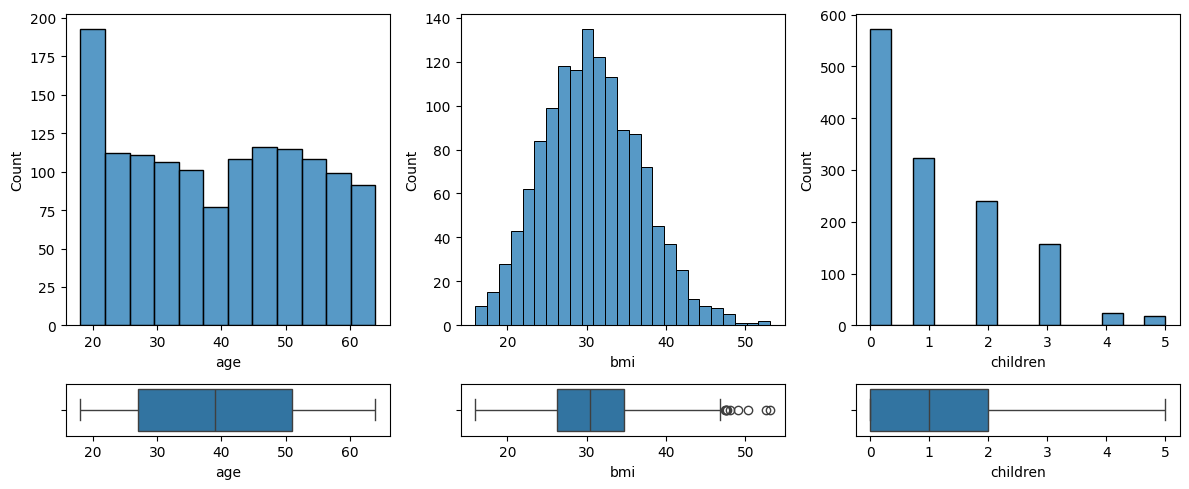

In [150]:
#visualizacion de datos numericos
fig, axis = plt.subplots(2, 3, figsize = (12, 5), gridspec_kw = {"height_ratios": [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[0, 2], data = df, x = "children")
sns.boxplot(ax = axis[1, 2], data = df, x = "children")

plt.tight_layout()
plt.show()

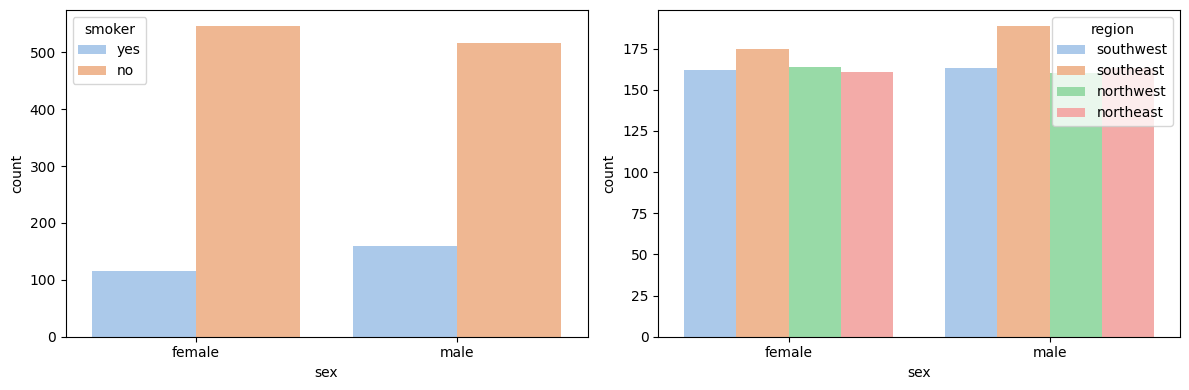

In [151]:
#relacion entre parametros categoricos
fig, axis = plt.subplots(1,2, figsize=(12, 4))

sns.countplot(ax=axis[0], data = df, x = "sex", palette="pastel", hue = 'smoker')
sns.countplot(ax=axis[1], data = df, x = "sex", palette="pastel", hue = 'region')

plt.tight_layout()
plt.show()

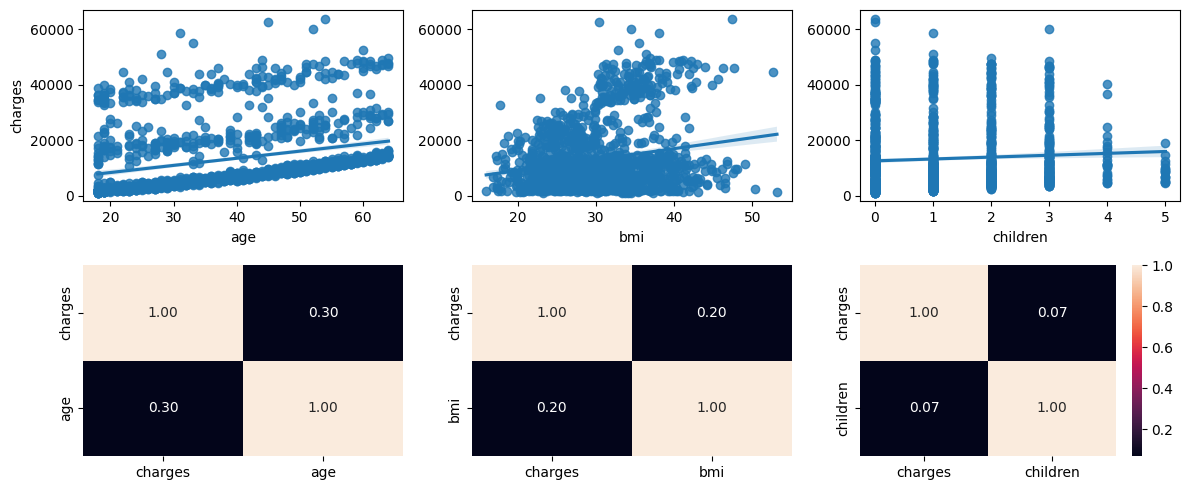

In [152]:
#relacion entre parametros numericos
fig, axis = plt.subplots(2, 3, figsize = (12, 5))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges").set(ylabel = None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()
plt.show()



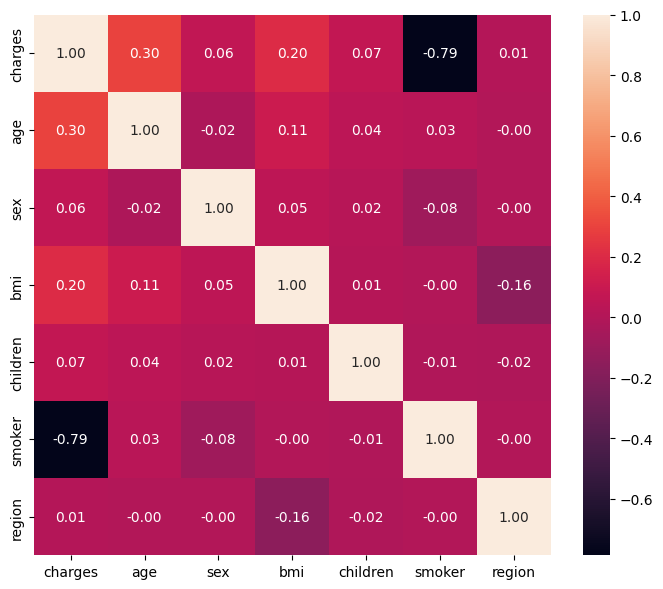

In [153]:
#correlacion entre parametros numericos-categoricos
df["sex"] = pd.factorize(df["sex"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
df["region"] = pd.factorize(df["region"])[0]

fig, axes = plt.subplots(figsize=(7,6))

sns.heatmap(df[['charges','age','sex','bmi','children','smoker','region']].corr(),annot=True,fmt=".2f")

plt.tight_layout()
plt.show()

In [154]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


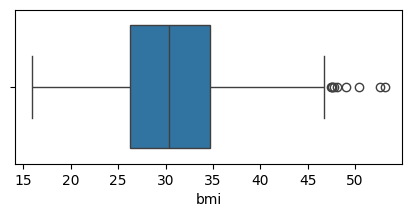

In [155]:
#busqueda y visualizacion de valores atipicos
fig, axis = plt.subplots(figsize = (5,2))

sns.boxplot(data = df, x = "bmi")

plt.show()

In [156]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
bmi_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * bmi_IQR
lower_limit = Q1 - 1.5 * bmi_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [157]:
df[df['bmi']>47].shape

(9, 7)

In [158]:
df = df.drop(df[df['bmi'] > 47].index)
df.shape

(1328, 7)

In [159]:
#conteo y reemplazo de valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [160]:
#division de los datos en train y test
from sklearn.model_selection import train_test_split

X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker,region
817,47,0,26.125,1,0,3
727,18,0,40.280,0,1,3
48,60,0,24.530,0,1,1
113,21,0,35.720,0,1,2
156,48,1,24.420,0,0,1


In [161]:
#normalizacion de los datos
from sklearn.preprocessing import MinMaxScaler

columnas = ['age','sex','bmi','children','smoker','region']
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train[columnas])
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=columnas)

X_test_norm = scaler.fit_transform(X_test[columnas])
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=columnas)

X_train_norm.head()

,age,sex,bmi,children,smoker,region
817,0.630435,0.0,0.332516,0.2,0.0,1.000000
727,0.000000,0.0,0.795551,0.0,1.0,1.000000
48,0.913043,0.0,0.280340,0.0,1.0,0.333333
113,0.065217,0.0,0.646385,0.0,1.0,0.666667
156,0.652174,1.0,0.276742,0.0,0.0,0.333333


In [162]:
#seleccion de los mejores parametros
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(score_func = f_regression, k = 5)

X_train_norm = pd.DataFrame(selection_model.fit_transform(X_train_norm,y_train), columns = X_train_norm.columns.values[selection_model.get_support()])
X_test_norm = pd.DataFrame(selection_model.fit_transform(X_test_norm,y_test), columns = X_test_norm.columns.values[selection_model.get_support()])

X_train_norm.head()

,age,sex,bmi,children,smoker
0,0.630435,0.0,0.332516,0.2,0.0
1,0.000000,0.0,0.795551,0.0,1.0
2,0.913043,0.0,0.280340,0.0,1.0
3,0.065217,0.0,0.646385,0.0,1.0
4,0.652174,1.0,0.276742,0.0,0.0


In [163]:
#regresion logistica
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(X_test_norm)
y_pred

array([ 7289.5994166 , 12445.23713366,  9879.37094013,  7295.54461165,
        3746.70064655, 14194.52988045,  7798.83941272,  5773.34995203,
        4382.32979655, 18110.23137165,  3213.84261197, 30811.32002173,
        5946.89257404, 32425.20369903,  5234.60080341, 13324.06502937,
        9820.38786952,  6430.88024087, 10245.46425285, 28348.05383908,
        6992.61990435,  8964.97332949,  8356.3134084 , 33512.42956847,
        -285.47659018, 12994.85187814,  6871.25899241,  7154.33753765,
        8240.36080167, 28125.82454747,  6321.66227493,  7172.54940887,
        5116.90442546, 34830.42981618,  5870.03279688,  7382.20456776,
        5521.21719488,  3974.84446747,  -187.11669385, 35637.31290214,
        5265.03279603,  -579.66576092,  6291.21011733,  4936.97360259,
       10284.42121225,  9257.06178831, 14925.35818622,  4714.24265553,
       15281.80521715, 35135.96952958,    54.68817691,  3711.98918997,
       10969.70428874,  1803.55055663, 29712.4130587 ,   121.33334219,
      

In [165]:
#precision del modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 30926478.38497386
Coeficiente de determinación: 0.7566711205806634
